<a href="https://colab.research.google.com/github/iffyaiyan/The_Hewlett/blob/main/The_Hewlett.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/19AJ1FJNJD_n-olYasowaSS_8QZAQ7ZvQ/view?usp=sharing'

# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('training_set_rel3.xlxs')

In [ ]:
# Setting the train link for train_set

train_link = 'https://drive.google.com/file/d/17aIqfTDRBZk8kyxfZBlUDWpKCT1Fa-hC/view?usp=sharing'

# to get the id part of the file 
id = train_link.split("/")[-2] 
  
downloaded1 = drive.CreateFile({'id':id})  
downloaded1.GetContentFile('training_set_rel3.tsv')


In [ ]:
# Setting the test link for test_set

test_link = 'https://drive.google.com/file/d/1v_grUL-wmw2DFbtL8T7La2k8bVRMiFX3/view?usp=sharing'

# to get the id part of the file 
id = test_link.split("/")[-2] 
  
downloaded2 = drive.CreateFile({'id':id})  
downloaded2.GetContentFile('test_set.tsv')


NameError: ignored

Importing the Important Libraries

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from string import punctuation
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer


from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.model_selection import train_test_split
import collections

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Train and Test set

In [ ]:
df_train = pd.read_csv('training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
df_test = pd.read_csv('test_set.tsv', sep='\t', encoding='ISO-8859-1')

In [ ]:
# Looking at the train set
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Looking at the test set

df_test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN


In [ ]:
# Getting more info about the test info

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4254 entries, 0 to 4253
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   essay_id              4254 non-null   int64  
 1   essay_set             4254 non-null   int64  
 2   essay                 4254 non-null   object 
 3   domain1_predictionid  4254 non-null   int64  
 4   domain2_predictionid  600 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 166.3+ KB


In [ ]:
# Getting the shape of the test set

df_train.shape

(12976, 28)

In [ ]:
# Getting more info about the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [ ]:
# Let's check how many values are none in each row of the train dataset
df_train.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [ ]:
# Since a large part of the dataset has columns with more than 70-80 percent missing values so Deleting those columns
df_train.dropna(axis = 1, inplace = True)
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [ ]:
# Describing the train set
df_train.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,4.127158,4.137408,6.800247
std,6309.074105,2.136913,4.212544,4.264330,8.970705
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4438.750000,2.000000,2.000000,2.000000,2.000000
50%,10044.500000,4.000000,3.000000,3.000000,3.000000
75%,15681.250000,6.000000,4.000000,4.000000,8.000000
max,21633.000000,8.000000,30.000000,30.000000,60.000000


In [ ]:
# Checking how many unique essay id were given
print(df_train['essay_set'].nunique())
df_train['essay_set'].unique()

8


array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# Counting the number of eacy essay_set

print(df_train.groupby('essay_set').size())

essay_set
1    1783
2    1800
3    1726
4    1770
5    1805
6    1800
7    1569
8     723
dtype: int64


So there is 8 unique set of essay in the given training set

In [ ]:
# Lets see the unique ratings which are being given by the rater1

print(df_train['rater1_domain1'].nunique())
df_train['rater1_domain1'].unique()

30


array([ 4,  5,  3,  6,  2,  1,  0,  8,  7, 11,  9, 10, 12, 18, 21, 15, 20,
       16, 23, 22, 17, 19, 25, 13, 30, 24, 14, 27, 26, 28])

In [ ]:
# Counting the number of rates of each rates given by rater1

print(df_train.groupby('rater1_domain1').size())

rater1_domain1
0      462
1     2062
2     2556
3     2789
4     2254
5      704
6      266
7      127
8      420
9      206
10     148
11     102
12     182
13      13
14       9
15     113
16      46
17      74
18      73
19      30
20     245
21      22
22      14
23      19
24       6
25      27
26       1
27       2
28       1
30       3
dtype: int64


There is 30 rating points ranging from 0 to 30 excluding the 29 which have been given by rater1 to differen essay sests

In [ ]:
# Lets see the unique ratings which are being given by the rater2

print(df_train['rater2_domain1'].nunique())
df_train['rater2_domain1'].unique()

29


array([ 4,  3,  5,  6,  2,  1,  0,  7,  8,  9, 12, 10, 11, 16, 26, 20, 15,
       18, 19, 25, 17, 24, 22, 30, 21, 14, 23, 13, 27])

In [ ]:
# Counting the number of rates of each rates given by rater1

print(df_train.groupby('rater1_domain1').size())

rater1_domain1
0      462
1     2062
2     2556
3     2789
4     2254
5      704
6      266
7      127
8      420
9      206
10     148
11     102
12     182
13      13
14       9
15     113
16      46
17      74
18      73
19      30
20     245
21      22
22      14
23      19
24       6
25      27
26       1
27       2
28       1
30       3
dtype: int64


There is 29 rating points ranging from 0 to 30 excluding the 28 and 29 which have been given by rater2 to differen essay sests

In [ ]:
# Maximum domain score obtained by any essay

df_train['domain1_score'].max()

60

The maximum score that an essay scored is 60

In [ ]:
# Minimum domain score obtained by any essay

df_train['domain1_score'].min()

0

The minimum score that was scored by any essay is 0

## Visualization

In [ ]:
# Visualizing the percentage wise share of the various sets of essay 

labels = df_train['essay_set'].value_counts().index
values = df_train['essay_set'].value_counts().values

colors = df_train['essay_set']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors, line=dict(color='#000000', width=2)), 
                              title = "Distribution of sets of essay")])

fig.show()

From the above Pie-Chart we can see that set 8 was the least distributed set

In [ ]:
# Visualizing the percentage wise share of top 10 grades given by rater 1 and their percentage

labels = df_train['rater1_domain1'].value_counts()[:10].index
values = df_train['rater1_domain1'].value_counts()[:10].values

colors = df_train['rater1_domain1']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors), 
                              title = "Top 10 grades given by rater 1 and their percentage")])

fig.show()

From the above plot we can see that a large section of the essay rated by rater1 received just rating as 3,2,4 and 1

In [ ]:
# Visualizing the percentage wise share of top 10 grades given by rater 1 and their percentage

labels = df_train['rater2_domain1'].value_counts()[:10].index
values = df_train['rater2_domain1'].value_counts()[:10].values

colors = df_train['rater2_domain1']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors), 
                              title = "Top 10 grades given by rater2 and their percentage")])

fig.show()

From the above plot we can see that a large section of the essay rated by rater2 received just rating as 3,2,4 and 1

## Data Prepocessing

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming
* Lemmatization

### Cleaning the Text

In [ ]:
# Defining function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# Applying clean text function on short_description to clean the text of train set

df_train['essay'] = df_train['essay'].apply(lambda x: clean_text(x))

In [ ]:
# Now checking whether the text of the essay columns have been changed or not

df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,dear local newspaper i think effects computers...,4,4,8
1,2,1,dear i believe that using computers will ben...,5,4,9
2,3,1,dear more and more people use computers but...,4,3,7
3,4,1,dear local newspaper i have found that many e...,5,5,10
4,5,1,dear i know having computers has a positive e...,4,4,8


### Plotting the WordCloud

**Word cloud** is a technique for visualising frequent words in a text where the size of the words represents their frequency

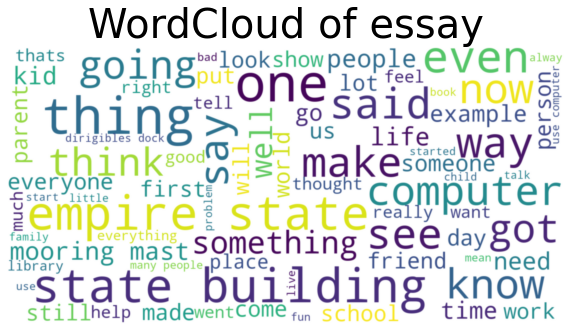

In [ ]:
word_cloud = WordCloud(
                       width=1600,
                       height=800, 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white"
            ).generate(" ".join(df_train['essay']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('WordCloud of essay', fontsize = 40)
plt.axis("off")
plt.show()

In [ ]:
# Applying clean text function on short_description to clean the text of test set

df_test['essay'] = df_test['essay'].apply(lambda x: clean_text(x))

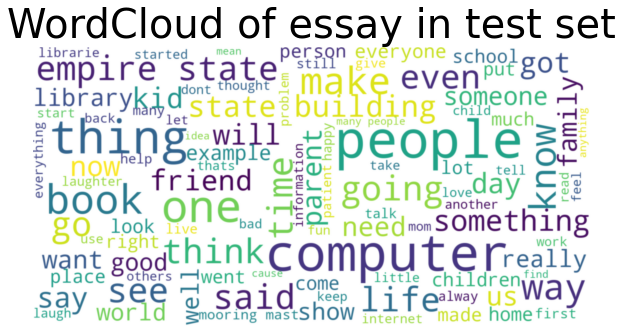

In [ ]:
word_cloud = WordCloud(
                       width=1600,
                       height=800, 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white"
            ).generate(" ".join(df_test['essay']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('WordCloud of essay in test set', fontsize = 40)
plt.axis("off")
plt.show()

## Tokenizing

**What is Tokenization?**
A token is a piece of a whole, so a word is a token in a sentence, and a sentence is a token in a paragraph. Tokenization is the process of splitting a string into a list of tokens.



In [ ]:
print()
text = "I love you, don't you"

# instantiate tokenizer class
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')

print("Example Text: ", text)
print("Tokenization by whitespace: ", tokenizer1.tokenize(text))
print("Tokenization by words using Treebank Word Tokenizer: ", tokenizer2.tokenize(text))
print("Tokenization by punctuation: ", tokenizer3.tokenize(text))
print("Tokenization by regular expression: ", tokenizer4.tokenize(text))


Example Text:  I love you, don't you
Tokenization by whitespace:  ['I', 'love', 'you,', "don't", 'you']
Tokenization by words using Treebank Word Tokenizer:  ['I', 'love', 'you', ',', 'do', "n't", 'you']
Tokenization by punctuation:  ['I', 'love', 'you', ',', 'don', "'", 't', 'you']
Tokenization by regular expression:  ['I', 'love', 'you', 'don', 't', 'you']


In [ ]:
# Tokenizing the training and test set

# instantiate the tokenizer class
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# Tokenizing the training set
df_train['essay'] = df_train['essay'].apply(lambda x: tokenizer.tokenize(x))

# Tokenizing the test set
df_test['essay'] = df_test['essay'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
# Printing the tokenized string of the training set
print()
print('Tokenized String:')
df_train['essay'].head()


Tokenized String:


0    [dear, local, newspaper, i, think, effects, co...
1    [dear, i, believe, that, using, computers, wil...
2    [dear, more, and, more, people, use, computers...
3    [dear, local, newspaper, i, have, found, that,...
4    [dear, i, know, having, computers, has, a, pos...
Name: essay, dtype: object

In [ ]:
# Printing the tokenized string of the testing set

print()
print('Tokenized String:')
df_test['essay'].head()


Tokenized String:


0    [i, believe, that, computers, have, a, positiv...
1    [dear, i, know, some, problems, have, came, up...
2    [dear, to, whom, it, concern, computers, arent...
3    [dear, has, come, to, my, attention, that, som...
4    [dear, local, newspaper, i, think, that, peopl...
Name: essay, dtype: object

## Stopwords

The next step is to remove stop words. Stop words are words that don't add significant meaning to the text.

In [ ]:
# Defining function to remove the stopwords

def remove_stopwords(text):
    
    words = [word for word in text if word not in stopwords.words('english')]
    return words

In [ ]:
# Removing the stopwords from the training set
nltk.download('stopwords')
df_train['essay'] = df_train['essay'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Removing the stopwords from the test set

df_test['essay'] = df_test['essay'].apply(lambda x: remove_stopwords(x))

In [ ]:
# lets now look at the training set

df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"[dear, local, newspaper, think, effects, compu...",4,4,8
1,2,1,"[dear, believe, using, computers, benefit, us,...",5,4,9
2,3,1,"[dear, people, use, computers, everyone, agree...",4,3,7
3,4,1,"[dear, local, newspaper, found, many, experts,...",5,5,10
4,5,1,"[dear, know, computers, positive, effect, peop...",4,4,8


In [ ]:
# lets now look at the test set

df_test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,"[believe, computers, positive, effect, people,...",2383,NaN
1,2384,1,"[dear, know, problems, came, individuals, agre...",2384,NaN
2,2385,1,"[dear, concern, computers, arent, reason, peop...",2385,NaN
3,2386,1,"[dear, come, attention, people, believe, techn...",2386,NaN
4,2387,1,"[dear, local, newspaper, think, people, lately...",2387,NaN


## Normalizing the Tokens and Stemming

In [ ]:
# Stemming and Lemmatization examples

nltk.download('wordnet')

text = "How is the Josh"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

# Stemmer 
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

# Lemmatizer 
lemmatizer = nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Stemming the sentence:  how is the josh
Lemmatizing the sentence:  How is the Josh


In [ ]:
# After preprocessing the text format

def combine_text(list_of_text):
    
    combined_text = ' '.join(list_of_text)
    return combined_text

In [ ]:
# Preprocessing the train set

df_train['essay'] = df_train['essay'].apply(lambda x: combine_text(x))

df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,dear local newspaper think effects computers p...,4,4,8
1,2,1,dear believe using computers benefit us many w...,5,4,9
2,3,1,dear people use computers everyone agrees bene...,4,3,7
3,4,1,dear local newspaper found many experts say co...,5,5,10
4,5,1,dear know computers positive effect people com...,4,4,8


In [ ]:
# Preprocessing the test set

df_test['essay'] = df_test['essay'].apply(lambda x: combine_text(x))
df_test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,believe computers positive effect people help ...,2383,NaN
1,2384,1,dear know problems came individuals agree bene...,2384,NaN
2,2385,1,dear concern computers arent reason people don...,2385,NaN
3,2386,1,dear come attention people believe technology ...,2386,NaN
4,2387,1,dear local newspaper think people lately spent...,2387,NaN


In [ ]:
# text preprocessing functions 
def text_preprocessing(text):
    
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [word for word in tokenized_text if word not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

## Transforming tokens to Vector

In [ ]:
# CountVectorizer can do all the above task of preprocessing, tokenization, and stop words removal

count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(df_train['essay'])
test_vectors = count_vectorizer.transform(df_test['essay'])

# Keeping only non-zero elements to preserve spaces
print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


In [ ]:
# TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(df_train['essay'])
test_tfidf = tfidf.transform(df_test['essay'])

## Building the Final Model

In [ ]:
# Using the KNeighbors Classifiers

from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier()

classifier.fit(train_vectors, df_train["domain1_score"])
training_score = cross_val_score(classifier, train_vectors, df_train["domain1_score"], cv=5)
print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Classifiers:  KNeighborsClassifier Has a training score of 20.0 % accuracy score
